# ATLAS (Algorithmic Trading via Language Analysis of Sentiment)

ATLAS is a experimental tool for trading stocks using sentiment analysis of headlines. 

## 1. Datasets

### 1.a. Headlines

In [1]:
import pandas as pd
from pathlib import Path
import webbrowser

headlines_path = Path("Data/analyst_ratings_processed.csv")
if not headlines_path.exists():
    print(
        "Please first download the analyst_ratings_processed.csv from:\n"
        "https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests"
    )
    webbrowser.open("https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests")
    raise FileNotFoundError()

headlines = pd.read_csv(headlines_path)
headlines.drop(headlines.columns[0], axis=1, inplace=True)
headlines

,title,date,stock
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A
...,...,...,...
1400464,Top Narrow Based Indexes For August 29,2011-08-29 10:41:00-04:00,ZX
1400465,Recap: Wednesday's Top Percentage Gainers and ...,2011-06-22 16:44:00-04:00,ZX
1400466,UPDATE: Oppenheimer Color on China Zenix Auto ...,2011-06-21 08:26:00-04:00,ZX
1400467,Oppenheimer Initiates China Zenix At Outperfor...,2011-06-21 05:59:00-04:00,ZX


In [79]:
counts = headlines["stock"].value_counts()

# get stocks with more than 100 headlines
to_keep = counts[counts >= 100].index
print(to_keep.unique().to_list())

['MRK', 'MS', 'MU', 'NVDA', 'QQQ', 'M', 'EBAY', 'NFLX', 'GILD', 'VZ', 'DAL', 'JNJ', 'QCOM', 'BABA', 'KO', 'ORCL', 'FDX', 'HD', 'WFC', 'BBRY', 'BMY', 'JCP', 'LLY', 'AGN', 'CMG', 'CAT', 'GPRO', 'TWX', 'CHK', 'FSLR', 'NOK', 'P', 'LMT', 'MCD', 'MA', 'EA', 'FCX', 'EWU', 'GPS', 'PEP', 'XLF', 'GRPN', 'TM', 'GLD', 'EWP', 'HAL', 'LOW', 'XRT', 'ADBE', 'AZN', 'MYL', 'DISH', 'ATVI', 'TSLA', 'MDT', 'DB', 'LNKD', 'EWI', 'BIIB', 'BIDU', 'DE', 'AXP', 'CMCSA', 'CVS', 'A', 'WDC', 'PFE', 'RIG', 'BAC', 'MON', 'KR', 'NVS', 'KSS', 'GMCR', 'PCG', 'GME', 'YUM', 'JWN', 'SLV', 'EWJ', 'TXN', 'SNY', 'COP', 'VMW', 'APC', 'ZNGA', 'PCLN', 'BBBY', 'SHLD', 'AVGO', 'YELP', 'DG', 'URBN', 'STX', 'EWZ', 'CSX', 'AIG', 'RAD', 'GSK', 'GOOGL', 'CCL', 'AKS', 'HUM', 'JBLU', 'FCAU', 'FEYE', 'FOXA', 'EWC', 'NTAP', 'NBG', 'DD', 'ANF', 'HTZ', 'MRVL', 'DRI', 'DLTR', 'TIF', 'MMM', 'AEO', 'CLF', 'REGN', 'DKS', 'TSN', 'CRM', 'BX', 'EWW', 'XLE', 'MO', 'UA', 'YHOO', 'BSX', 'XLK', 'FL', 'GIS', 'BLK', 'LEN', 'JNPR', 'AET', 'TLT', 'WFM', 'C

Picking a few "interesting" stocks based on:
 - responsiveness to news
 - media presence
 - how new the technology is
 - stock volatility

In [2]:
stock_picks = [
    "NVDA", "QCOM", "AAPL", "GOOGL", "BIDU", "AMD", "GPRO",  # tech
    "NFLX", "EA", "ATVI",  # entertainment
    "BABA",  # e-commerce
    "BIIB", "PFE", "AZN",  # pharma
    "LMT",  # defense
    "TSLA", "FSLR",  # energy
    "DAL",  # transport
]

In [ ]:
print(counts[stock_picks])
print("Total headlines:", sum(counts[stock_picks]))

stock
NVDA     3133
QCOM     2915
AAPL      469
GOOGL    1585
BIDU     1887
AMD       250
GPRO     2292
NFLX     3009
EA       2166
ATVI     1946
BABA     2820
BIIB     1901
PFE      1798
AZN      1990
LMT      2213
TSLA     1930
FSLR     2232
DAL      2929
Name: count, dtype: int64
Total headlines: 37465


In [81]:
filtered_headlines = headlines[headlines["stock"].isin(stock_picks)]

filtered_headlines["week"] = pd.to_datetime(
    filtered_headlines["date"], format="%Y-%m-%d %H:%M:%S%z", utc=True
).dt.to_period("W").apply(lambda x: x.start_time)

filtered_headlines["date"] = pd.to_datetime(
    filtered_headlines["date"], format="%Y-%m-%d %H:%M:%S%z", utc=True
).dt.date

filtered_headlines

C:\Users\reime\AppData\Local\Temp\ipykernel_23936\2586401943.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ).dt.to_period("W").apply(lambda x: x.start_time)
C:\Users\reime\AppData\Local\Temp\ipykernel_23936\2586401943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_headlines["week"] = pd.to_datetime(
C:\Users\reime\AppData\Local\Temp\ipykernel_23936\2586401943.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_headlines["date"] = p

,title,date,stock,week
3668,Tech Stocks And FAANGS Strong Again To Start D...,2020-06-10,AAPL,2020-06-08
3669,10 Biggest Price Target Changes For Wednesday,2020-06-10,AAPL,2020-06-08
3670,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",2020-06-10,AAPL,2020-06-08
3671,"Deutsche Bank Maintains Buy on Apple, Raises P...",2020-06-10,AAPL,2020-06-08
3672,Apple To Let Users Trade In Their Mac Computer...,2020-06-10,AAPL,2020-06-08
...,...,...,...,...
1250207,Electrek.Co Tweet: Tesla's head of Europe is out,2019-07-02,TSLA,2019-07-01
1250208,Tesla's Q2 Delivery Number Could Cause A Big Move,2019-07-01,TSLA,2019-07-01
1250209,'Tesla Electric Airplane? Elon Musk sees elect...,2019-07-01,TSLA,2019-07-01
1250210,"UPDATE: JMP Reiterates Outperform, $347 Target...",2019-07-01,TSLA,2019-07-01


In [82]:
daily_headlines = filtered_headlines.groupby(["date", "stock"])["title"].apply(
    lambda x: " || ".join(x)
).reset_index()
daily_headlines

,date,stock,title
0,2009-08-14,DAL,AnalystChoice.com Brings You the Best Complime...
1,2009-08-16,EA,Michael Vick Joins Electronic Arts' Last Hurrah
2,2009-08-17,AZN,Trends in the U.K. and Irish Pharmaceutical an...
3,2009-08-17,EA,Tiger Woods 10 for Wii: An Electronic Arts Epi...
4,2009-08-25,ATVI,Activision (ATVI) new games will boost company...
...,...,...,...
15199,2020-06-10,PFE,The Daily Biotech Pulse: Keytruda Setback For ...
15200,2020-06-10,TSLA,Tesla's Stock Closes At All-Time High As Musk ...
15201,2020-06-11,AZN,Johnson & Johnson To Start Coronavirus Vaccine...
15202,2020-06-11,LMT,"UBS Maintains Buy on Lockheed Martin, Lowers P..."


In [83]:
weekly_headlines = filtered_headlines.groupby(["week", "stock"])["title"].apply(
    lambda x: " || ".join(x)
).reset_index()
weekly_headlines

,week,stock,title
0,2009-08-10,DAL,AnalystChoice.com Brings You the Best Complime...
1,2009-08-10,EA,Michael Vick Joins Electronic Arts' Last Hurrah
2,2009-08-17,AZN,Trends in the U.K. and Irish Pharmaceutical an...
3,2009-08-17,EA,Tiger Woods 10 for Wii: An Electronic Arts Epi...
4,2009-08-24,ATVI,Activision (ATVI) new games will boost company...
...,...,...,...
5558,2020-06-08,NFLX,As Expected: Fed Keeps Rates Unchanged and For...
5559,2020-06-08,NVDA,Shares of several technology companies are tra...
5560,2020-06-08,PFE,Shares of several healthcare companies are tra...
5561,2020-06-08,QCOM,NASDAQ Closes At All-Time High


### 1.b. Stock Prices

In [ ]:
stock_prices: dict[str, pd.DataFrame] = {}
for stock in stock_picks:
    stock_prices[stock] = pd.read_csv(f"Data/stocks/{stock}.csv")
    stock_prices[stock]["Date"] = pd.to_datetime(stock_prices[stock]["Date"])

for stock, prices in stock_prices.items():
    print(f"{stock}:\t{prices['Date'].min().date()} ~ {prices['Date'].max().date()} ({len(prices)})")

NVDA:	1999-01-22 ~ 2020-04-01 (5334)
QCOM:	1991-12-13 ~ 2020-04-01 (7128)
AAPL:	1980-12-12 ~ 2020-04-01 (9909)
GOOGL:	2004-08-19 ~ 2020-04-01 (3932)
BIDU:	2005-08-05 ~ 2020-04-01 (3689)
AMD:	1980-03-17 ~ 2020-04-01 (10098)
GPRO:	2014-06-26 ~ 2020-04-01 (1452)
NFLX:	2002-05-23 ~ 2020-04-01 (4496)
EA:	1989-09-20 ~ 2020-04-01 (7693)
ATVI:	1993-10-25 ~ 2020-04-01 (6657)
BABA:	2014-09-19 ~ 2020-04-01 (1393)
BIIB:	1991-09-17 ~ 2020-04-01 (7190)
PFE:	1972-06-01 ~ 2020-04-01 (12064)
AZN:	1993-05-12 ~ 2020-04-01 (6772)
LMT:	1977-01-03 ~ 2020-04-01 (10908)
TSLA:	2010-06-29 ~ 2020-04-01 (2457)
FSLR:	2006-11-17 ~ 2020-04-01 (3364)
DAL:	2007-05-03 ~ 2020-04-01 (3252)


In [85]:
# merge into one df
stockdata = None
for stock, prices in stock_prices.items():
    if stockdata is None:
        stockdata = prices[["Date", "Close"]].rename(columns={"Close": stock})
    else:
        stockdata = stockdata.merge(
            prices[["Date", "Close"]],
            on="Date", how="outer"
        ).rename(columns={"Close": stock})
stockdata = stockdata.sort_values("Date").reset_index(drop=True)
stockdata


,Date,NVDA,QCOM,AAPL,GOOGL,BIDU,AMD,GPRO,NFLX,EA,ATVI,BABA,BIIB,PFE,AZN,LMT,TSLA,FSLR,DAL
0,1972-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.859375,NaN,NaN,NaN,NaN,NaN
1,1972-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.848958,NaN,NaN,NaN,NaN,NaN
2,1972-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.846354,NaN,NaN,NaN,NaN,NaN
3,1972-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.864583,NaN,NaN,NaN,NaN,NaN
4,1972-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.864583,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12061,2020-03-26,257.239990,68.980003,258.440002,1162.920044,101.820000,47.500000,2.70,362.989990,99.199997,57.720001,195.320007,304.940002,31.750000,42.360001,350.329987,528.159973,37.619999,31.700001
12062,2020-03-27,252.729996,66.589996,247.740005,1110.260010,97.629997,46.580002,2.48,357.119995,95.370003,56.959999,188.589996,296.750000,30.900000,42.470001,348.380005,514.359985,35.630001,29.549999
12063,2020-03-30,265.589996,69.029999,254.809998,1146.310059,98.949997,47.860001,2.64,370.959991,97.690002,58.470001,191.270004,316.130005,32.669998,44.529999,348.850006,502.130005,36.060001,28.670000
12064,2020-03-31,263.600006,67.650002,254.289993,1161.949951,100.790001,45.480000,2.62,375.500000,100.169998,59.480000,194.479996,316.380005,32.639999,44.660000,338.950012,524.000000,36.060001,28.530001


In [3]:
def merge_daily(daily_headlines: pd.DataFrame, stockdata: pd.DataFrame) -> pd.DataFrame:
    """Combines (daily_headlines[date, stock] -> title) and
    (stockdata[Date, <stock_name>] -> price) to generate
    (merged[date, stock] -> headlines, price, delta), where headlines is the headlines
    of the stock from the date, price is the price of the stock the following date, and
    delta is the price change of the stock between the date and the following date.
    """
    # do not modify original
    daily_headlines = daily_headlines.copy()
    stockdata = stockdata.copy()
    
    daily_headlines["date"] = pd.to_datetime(daily_headlines["date"])
    stockdata["date"] = pd.to_datetime(stockdata["Date"])
    stockdata = stockdata.melt(id_vars=["date"], var_name="stock", value_name="price")
    
    stockdata_shifted = stockdata.copy()
    stockdata_shifted["date"] -= pd.Timedelta(days=1)
    
    merged = daily_headlines.merge(
        stockdata.rename(columns={"price": "prev_price"}),
        on=["date", "stock"],
        how="left"
    )
    merged = merged.merge(
        stockdata_shifted,
        on=["date", "stock"],
        how="left"
    )
    
    merged["delta"] = merged["price"] - merged["prev_price"]
    merged = merged.rename(columns={"title": "headlines"})
    merged = merged.dropna(subset=["price", "delta"])
    merged = merged[["date", "stock", "headlines", "price", "delta"]].reset_index()
    return merged

def merged_weekly(weekly_headlines: pd.DataFrame, stockdata: pd.DataFrame) -> pd.DataFrame:
    """Combines (weekly_headlines[week, stock] -> title) and
    (stockdata[Date, <stock_name>] -> price) to generate
    (merged[date, stock] -> headlines, price, delta), where headlines is the headlines
    of the stock from the date, price is the price of the stock the following week, and
    delta is the price change of the stock between the date and the following week.
    """
    # do not modify original
    weekly_headlines = weekly_headlines.copy()
    stockdata = stockdata.copy()
    
    weekly_headlines["date"] = pd.to_datetime(weekly_headlines["week"])
    stockdata["date"] = pd.to_datetime(stockdata["Date"])
    stockdata = stockdata.melt(id_vars=["date"], var_name="stock", value_name="price")
    
    stockdata_shifted = stockdata.copy()
    stockdata_shifted["date"] -= pd.Timedelta(days=7)
    
    merged = weekly_headlines.merge(
        stockdata.rename(columns={"price": "prev_price"}),
        on=["date", "stock"],
        how="left"
    )
    merged = merged.merge(
        stockdata_shifted,
        on=["date", "stock"],
        how="left"
    )
    
    merged["delta"] = merged["price"] - merged["prev_price"]
    merged = merged.rename(columns={"title": "headlines"})
    merged = merged.dropna(subset=["price", "delta"])
    merged = merged[["date", "stock", "headlines", "price", "delta"]].reset_index()
    return merged

In [ ]:
daily_stockdata = merge_daily(daily_headlines, stockdata)
daily_stockdata

,index,date,stock,headlines,price,delta
0,2,2009-08-17,AZN,Trends in the U.K. and Irish Pharmaceutical an...,23.0,0.379999
1,3,2009-08-17,EA,Tiger Woods 10 for Wii: An Electronic Arts Epi...,19.5,-0.07
2,4,2009-08-25,ATVI,Activision (ATVI) new games will boost company...,11.77,-0.099999
3,6,2009-08-31,AZN,Negative Implications for Eli Lilly's (LLY) Ef...,23.01,-0.305
4,7,2009-09-10,DAL,Airline Stocks in Focus After J.P. Morgan Upgr...,8.06,-0.04
...,...,...,...,...,...,...
11012,14532,2020-03-31,GOOGL,What Google And Is Doing To Fight The Coronavi...,1102.099976,-59.849976
11013,14533,2020-03-31,NFLX,Price Over Earnings Overview: Netflix,364.079987,-11.420013
11014,14534,2020-03-31,NVDA,Option Traders Make Massive Multimillion Dolla...,243.070007,-20.529999
11015,14535,2020-03-31,PFE,Attention Biotech Investors: Mark Your Calenda...,31.75,-0.889999


In [ ]:
weekly_stockdata = merged_weekly(weekly_headlines, stockdata)
weekly_stockdata

,index,date,stock,headlines,price,delta
0,0,2009-08-10,DAL,AnalystChoice.com Brings You the Best Complime...,6.6,-0.48
1,1,2009-08-10,EA,Michael Vick Joins Electronic Arts' Last Hurrah,19.57,-1.17
2,2,2009-08-17,AZN,Trends in the U.K. and Irish Pharmaceutical an...,23.08,0.459999
3,3,2009-08-17,EA,Tiger Woods 10 for Wii: An Electronic Arts Epi...,19.450001,-0.119999
4,4,2009-08-24,ATVI,Activision (ATVI) new games will boost company...,11.61,-0.55
...,...,...,...,...,...,...
4373,5366,2020-03-23,NFLX,Benzinga's Bulls And Bears Of The Week: Boeing...,370.959991,10.690002
4374,5367,2020-03-23,NVDA,Mellanox Shares Volatile Over Last Few Mins. O...,265.589996,52.899994
4375,5368,2020-03-23,PFE,"Barron's Picks And Pans: Tech Picks, SoftBank,...",32.669998,4.179998
4376,5369,2020-03-23,QCOM,"Shares of several technology, semiconductor, a...",69.029999,6.5


### 1.c. Filtering descriptive headlines

Now we have two datasets: `daily_stockdata` and `weekly_stockdata` with columns [`date`, `stock`, `headlines`, `price`, `delta`], where `price` = price of stock the following day/week of `date`, and `delta` being the difference between `price` and the previous price, but a lot of these headlines are really generic

In [88]:
weekly_stockdata["headlines"][:20].to_list()

['AnalystChoice.com Brings You the Best Complimentary Research Report on CYN, DIS, MXB, ALD, DAL and TCB',
 "Michael Vick Joins Electronic Arts' Last Hurrah",
 'Trends in the U.K. and Irish Pharmaceutical and Biotechnology Industry, an Industrial Info News Alert',
 'Tiger Woods 10 for Wii: An Electronic Arts Epiphany',
 'Activision (ATVI) new games will boost company, says Deutsche Bank (DB)',
 'AstraZeneca (AZN) Says Blood Thinner Drug Brilinta Works Better Than Plavix',
 'AstraZeneca (AZN) Gets Secretary Defense Award',
 'Airline Stocks In Focus (UAUA,DAL,LCC,CAL,AMR)  || Oneworld carriers working on competing Japan Airlines proposal',
 'Microsoft Corporation (MSFT) Has No Plans To Acquire Electronic Arts Inc. (ERTS)  || Stocks to Watch (CTAS,ERTS,RIMM,RHT,HERO,PAYX,PPS) || Electronic Arts (ERTS) Up Big on Takeover Rumors',
 'Airlines take in nearly $4 billion in additional fees',
 'Delta Air Lines (DAL) Extends Lease Agreement with Atlanta Airport Through 2017',
 'Is It Tea Time For

To Solve this, we can generate a tf-idf based score for each headline and exclude documents below a certain threshold

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np

def get_document_scores(headlines: pd.DataFrame, max_tickers: int) -> pd.DataFrame:
    # train tf-idf and count vectorizer
    documents = headlines["title"].to_list()
    vectorizer_arg = {
        "stop_words": "english",
        "strip_accents": "ascii",
        "lowercase": True,
        "ngram_range": (1, 1),
        "max_df": 0.9,
        "min_df": 1,
    }
    tfidf_vec = TfidfVectorizer(**vectorizer_arg, norm=None)
    count_vec = CountVectorizer(**vectorizer_arg)
    
    # get average tfidf score of words in documents
    document_scores = np.array(tfidf_vec.fit_transform(documents).sum(axis=1)).flatten()
    counts = np.array(count_vec.fit_transform(documents).sum(axis=1)).flatten()
    
    document_scores = np.divide(
        document_scores,
        counts,
        out=np.zeros_like(document_scores),
        where=(counts != 0)
    )  # ignore documents with score = 0 as we will get divide by 0
    
    # set score to 0 if there are n or more stock tickers consecutively
    reg = rf'(?:\b[A-Z]{{1,5}}\b[,]?\s*){{{max_tickers},}}\b[A-Z]{{1,5}}\b'
    document_scores[
        headlines["title"].str.contains(reg, regex=True)
    ] = 0
    
    return document_scores

In [118]:
document_scores = get_document_scores(headlines, 4)

In [119]:
threshold = 4.5
filtered_headlines = headlines[document_scores > threshold]
print(len(filtered_headlines) / len(headlines))
filtered_headlines["title"].to_list()

0.9544359782330062


['71 Biggest Movers From Friday',
 "46 Stocks Moving In Friday's Mid-Day Session",
 'B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88',
 'CFRA Maintains Hold on Agilent Technologies, Lowers Price Target to $85',
 'UBS Maintains Neutral on Agilent Technologies, Raises Price Target to $87',
 'Agilent Technologies shares are trading higher after the company reported better-than-expected Q2 EPS and sales results.',
 'Wells Fargo Maintains Overweight on Agilent Technologies, Raises Price Target to $95',
 '10 Biggest Price Target Changes For Friday',
 'SVB Leerink Maintains Outperform on Agilent Technologies, Raises Price Target to $95',
 "8 Stocks Moving In Thursday's After-Hours Session",
 'Agilent Technologies shares are trading higher after the company reported better-than-expected Q2 EPS and sales results.',
 'Agilent Technologies Q2 Adj. EPS $0.71 Beats $0.61 Estimate, Sales $1.24B Beat $1.21B Estimate',
 'Earnings Scheduled For May 21, 2020',
 'A

That seems to help get rid of a majority of headlines that are not very descriptive. Here are the removes headlines for comparisons:

In [ ]:
headlines[document_scores < threshold]["title"].to_list()

['Stocks That Hit 52-Week Highs On Friday',
 'Stocks That Hit 52-Week Highs On Wednesday',
 "30 Stocks Moving in Friday's Pre-Market Session",
 'Stocks That Hit 52-Week Highs On Wednesday',
 'Stocks That Hit 52-Week Highs On Friday',
 'Stocks That Hit 52-Week Highs On Thursday',
 'Stocks That Hit 52-Week Highs On Wednesday',
 'Stocks That Hit 52-Week Highs On Friday',
 'Stocks That Hit 52-Week Highs On Thursday',
 'Stocks That Hit 52-Week Highs On Friday',
 'Stocks That Hit 52-Week Highs On Friday',
 'Stocks That Hit 52-Week Highs On Thursday',
 'Stocks That Hit 52-Week Highs On Tuesday',
 'Stocks That Hit 52-Week Highs On Friday',
 "26 Stocks Moving In Tuesday's Pre-Market Session",
 "30 Stocks Moving In Wednesday's Pre-Market Session",
 "25 Stocks Moving In Tuesday's Pre-Market Session",
 "20 Stocks Moving In Wednesday's Pre-Market Session",
 "20 Stocks Moving In Tuesday's Pre-Market Session",
 "20 Stocks Moving In Thursday's Pre-Market Session",
 "10 Stocks Moving In Tuesday's Pre-M

### 1.d. Finalized Data
Now we can regenerate the weekly and daily stock data using the newly filtered dataset

In [5]:
import pandas as pd
from pathlib import Path
import webbrowser

def generate_data(threshold: float, max_tickers: int, stock_picks: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    """Returns daily and weekly stock data for the chosen stocks.
    
    The columns of both dataframes are date, stock, headlines, price, and delta.
    Price is the price of the stock the FOLLOWING day/week, while delta is the
    difference between price and the previous day/week's price.
    """
    
    # load headlines
    print("Loading headlines...")
    headlines_path = Path("Data/analyst_ratings_processed.csv")
    if not headlines_path.exists():
        print(
            "Please first download the analyst_ratings_processed.csv from:\n"
            "https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests"
        )
        webbrowser.open("https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests")
        raise FileNotFoundError()

    headlines = pd.read_csv(headlines_path)
    headlines = headlines.drop(headlines.columns[0], axis=1)
    
    # filter headlines
    print("Filtering headlines...")
    document_scores = get_document_scores(headlines, max_tickers)
    filtered_headlines = headlines[document_scores > threshold]
    kept_ratio = 100 * len(filtered_headlines) / len(headlines)
    print(f"{kept_ratio:.2f}% of headlines remain after filtering")
    
    # pick stocks
    print(f"Picking stocks...\nChosen stocks are: {stock_picks}")
    filtered_headlines = filtered_headlines[filtered_headlines["stock"].isin(stock_picks)]
    filtered_headlines["week"] = pd.to_datetime(
        filtered_headlines["date"], format="%Y-%m-%d %H:%M:%S%z", utc=True
    ).dt.to_period("W").apply(lambda x: x.start_time)
    filtered_headlines["date"] = pd.to_datetime(
        filtered_headlines["date"], format="%Y-%m-%d %H:%M:%S%z", utc=True
    ).dt.date
    
    # separate into daily and weekly
    daily_headlines = filtered_headlines.groupby(["date", "stock"])["title"].apply(
        lambda x: " || ".join(x)
    ).reset_index()
    weekly_headlines = filtered_headlines.groupby(["week", "stock"])["title"].apply(
        lambda x: " || ".join(x)
    ).reset_index()
    
    # load stock prices
    print("Loading stock prices...")
    stock_prices: dict[str, pd.DataFrame] = {}
    for stock in stock_picks:
        stock_prices[stock] = pd.read_csv(f"Data/stocks/{stock}.csv")
        stock_prices[stock]["Date"] = pd.to_datetime(stock_prices[stock]["Date"])
        
    stockdata = None
    for stock, prices in stock_prices.items():
        if stockdata is None:
            stockdata = prices[["Date", "Close"]].rename(columns={"Close": stock})
        else:
            stockdata = stockdata.merge(
                prices[["Date", "Close"]],
                on="Date", how="outer"
            ).rename(columns={"Close": stock})
    stockdata = stockdata.sort_values("Date").reset_index(drop=True)
    
    # merge datasets
    print("Merging datasets...")
    daily_stockdata = merge_daily(daily_headlines, stockdata)
    weekly_stockdata = merged_weekly(weekly_headlines, stockdata)
    
    return daily_stockdata, weekly_stockdata

daily_stockdata, weekly_stockdata = generate_data(4.5, 4, stock_picks)

Loading headlines...
Filtering headlines...
95.44% of headlines remain after filtering
Picking stocks...
Chosen stocks are: ['NVDA', 'QCOM', 'AAPL', 'GOOGL', 'BIDU', 'AMD', 'GPRO', 'NFLX', 'EA', 'ATVI', 'BABA', 'BIIB', 'PFE', 'AZN', 'LMT', 'TSLA', 'FSLR', 'DAL']


C:\Users\reime\AppData\Local\Temp\ipykernel_15016\422955722.py:39: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ).dt.to_period("W").apply(lambda x: x.start_time)


Loading stock prices...
Merging datasets...


In [6]:
weekly_stockdata["headlines"][:20].to_list()

["Michael Vick Joins Electronic Arts' Last Hurrah",
 'Trends in the U.K. and Irish Pharmaceutical and Biotechnology Industry, an Industrial Info News Alert',
 'Tiger Woods 10 for Wii: An Electronic Arts Epiphany',
 'Activision (ATVI) new games will boost company, says Deutsche Bank (DB)',
 'AstraZeneca (AZN) Says Blood Thinner Drug Brilinta Works Better Than Plavix',
 'AstraZeneca (AZN) Gets Secretary Defense Award',
 'Oneworld carriers working on competing Japan Airlines proposal',
 'Microsoft Corporation (MSFT) Has No Plans To Acquire Electronic Arts Inc. (ERTS)  || Electronic Arts (ERTS) Up Big on Takeover Rumors',
 'Airlines take in nearly $4 billion in additional fees',
 'Delta Air Lines (DAL) Extends Lease Agreement with Atlanta Airport Through 2017',
 'Is It Tea Time For This U.K. ETF (EWU)?',
 'FTSE 100 Daily Analysis 30th October 2009 || AstraZeneca (AZN) Beats Q3 Earnings And Revenue Estimates, Guides Higher || AstraZeneca (AZN) Pulls Regulatory Submissions For A Lung Cancer 

### 1.e. Data Visualization & Exploration

Here, we visualize the dataset by using glove to embed each headlines and using dimensionality reduction to plot them. More specifically, we embed each word using glove and average it for the headline. Then, we can use tsne to get a general feel of the distriubtion of the embeddings and use LDA to see if there is a linear pattern between these embeddings and the label.

In [ ]:
from gensim.models import KeyedVectors

glove = KeyedVectors.load("models/glove-wiki-gigaword-200.kv")
unk = glove.vectors.mean(axis=0).tolist()

headlines = weekly_stockdata[["headlines", "delta"]]
headlines["label"] = (headlines["delta"] > 0).astype(int)
headlines["headlines"] = headlines["headlines"].str.split(r" \|\| ")
headlines = headlines.explode("headlines").reset_index()

In [ ]:
from nltk.tokenize import word_tokenize
import numpy as np

def get_embedding(headline: str) -> np.ndarray:
    return np.mean([
        glove[t] if t in glove else unk
        for t in word_tokenize(headline.lower())
    ], axis=0)

headlines["embeddings"] = headlines["headlines"].apply(get_embedding)

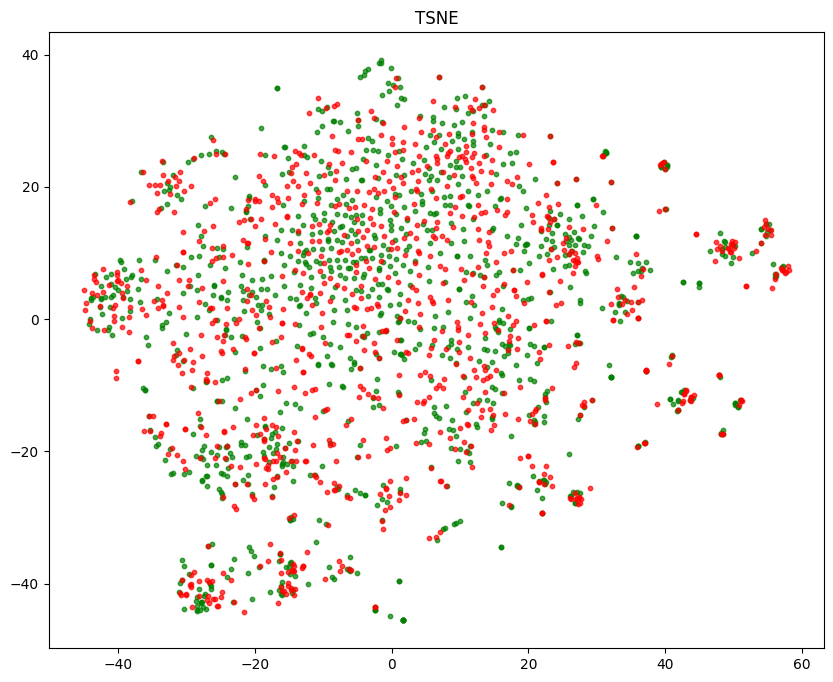

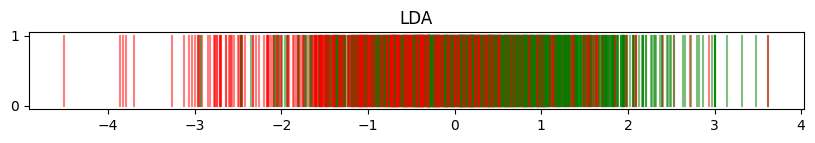

In [52]:
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

sampled_headlines = headlines.sample(n=2000, random_state=42).reset_index(drop=True)
embeddings = np.array(sampled_headlines["embeddings"].tolist())
labels = sampled_headlines["label"].values

# using tsne
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_tsne[labels == 1, 0], embeddings_tsne[labels == 1, 1], c="green", s=10, alpha=0.7)
plt.scatter(embeddings_tsne[labels == 0, 0], embeddings_tsne[labels == 0, 1], c="red", s=10, alpha=0.7)
plt.title("TSNE")
plt.savefig("figures/dataset_tsne.png")

# using LDA
lda = LDA(n_components=1)
embeddings_lda = lda.fit_transform(embeddings, labels)
plt.figure(figsize=(10, 1))
for i, (value, label) in enumerate(zip(embeddings_lda, labels)):
    plt.plot([value, value], [0, 1], color='green' if label == 1 else 'red', alpha=0.5)
plt.title("LDA")
plt.savefig("figures/dataset_lda.png")

Looks like the embeddings are pretty well distributed based on the output of the tsne plot. Furthermore, we can see some promising patterns of the headline embeddings and stock direction as shown in the LDA plot above, showing that there is likely some underlying correlation that our model can train on.